### Stock Market Price Analysis Model
Stock market open price prediction using the closing price and the closing volume of the previous day.
The financial data of TVS Moto Corp (NSE) used as the reference model.

In [ ]:
# Importing the required modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing necessary sklearn dependancies
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [ ]:
# Reading the data (currently only using the training data)
blank_values = ["null"]
data=pd.read_csv("TVSMOTOR.NS (2).csv",na_values=blank_values)
#data.head(10)

# Reading the test dataset
# test = pd.read_csv('TVSMOTOR_new.csv')
# test.drop(7, inplace=True)
# test

#### Data Preprocessing

In [ ]:
#Checking for null values
data.isna().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [ ]:
# Removing unwanted attributes - Date
data.drop(columns = "Date", inplace=True)
data
# test.drop(columns = "Date", inplace=True)
# test

,Open,High,Low,Close,Adj Close,Volume
0,12.497500,12.497500,12.497500,12.497500,9.298194,100.0
1,11.850000,12.000000,10.800000,11.547500,8.591388,33020.0
2,11.650000,11.650000,10.900000,11.200000,8.332849,25500.0
3,11.050000,11.050000,10.800000,10.807500,8.040827,13320.0
4,10.350000,11.000000,10.350000,10.742500,7.992465,47520.0
...,...,...,...,...,...,...
5699,1265.000000,1287.500000,1262.349976,1283.099976,1283.099976,1004944.0
5700,1278.050049,1301.000000,1270.349976,1293.199951,1293.199951,1409077.0
5701,1296.349976,1304.849976,1278.550049,1299.800049,1299.800049,875198.0
5702,1299.050049,1306.949951,1280.050049,1282.699951,1282.699951,531133.0


In [ ]:
data.dropna(how='all', inplace=True)
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Creating a new column called 'nextOpen' to store the next day's open price
# Iterating through all the rows, setting the value of nextOpen to the value of open Price of the next row
data['NextOpen'] = 0
data['NextOpen'][:-1] = data['Open'][1:]
data

<ipython-input-6-4d9fe304ad4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NextOpen'][:-1] = data['Open'][1:]


,Open,High,Low,Close,Adj Close,Volume,NextOpen
0,12.497500,12.497500,12.497500,12.497500,9.298194,100.0,11.850000
1,11.850000,12.000000,10.800000,11.547500,8.591388,33020.0,11.650000
2,11.650000,11.650000,10.900000,11.200000,8.332849,25500.0,11.050000
3,11.050000,11.050000,10.800000,10.807500,8.040827,13320.0,10.350000
4,10.350000,11.000000,10.350000,10.742500,7.992465,47520.0,10.950000
...,...,...,...,...,...,...,...
5698,1262.949951,1279.000000,1247.000000,1272.900024,1272.900024,1070539.0,1265.000000
5699,1265.000000,1287.500000,1262.349976,1283.099976,1283.099976,1004944.0,1278.050049
5700,1278.050049,1301.000000,1270.349976,1293.199951,1293.199951,1409077.0,1296.349976
5701,1296.349976,1304.849976,1278.550049,1299.800049,1299.800049,875198.0,1299.050049


In [ ]:
# Deleting the last row as it has value 0 for next open
data = data.drop(data.index[-1])
data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,NextOpen
5697,1239.250000,1265.900024,1230.000000,1261.150024,1261.150024,793692.0,1262.949951
5698,1262.949951,1279.000000,1247.000000,1272.900024,1272.900024,1070539.0,1265.000000
5699,1265.000000,1287.500000,1262.349976,1283.099976,1283.099976,1004944.0,1278.050049
5700,1278.050049,1301.000000,1270.349976,1293.199951,1293.199951,1409077.0,1296.349976
5701,1296.349976,1304.849976,1278.550049,1299.800049,1299.800049,875198.0,1299.050049


In [ ]:
# Removing the Column Open
data.drop(columns = "Open", inplace=True)
#data.head(5)

<Axes: >

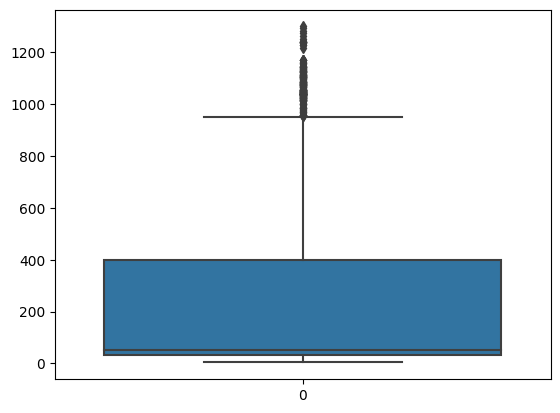

In [ ]:
# Checking for outliers
sns.boxplot(data.Close)

<Axes: >

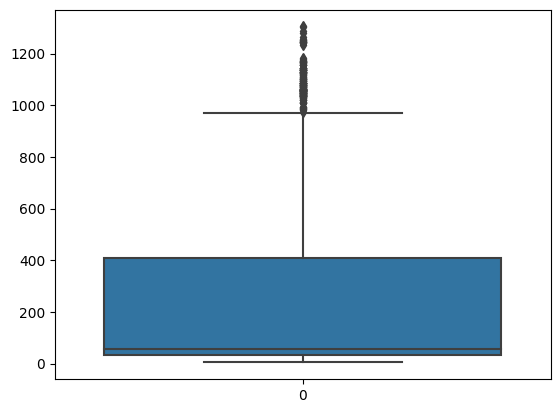

In [ ]:
sns.boxplot(data.High)

<Axes: >

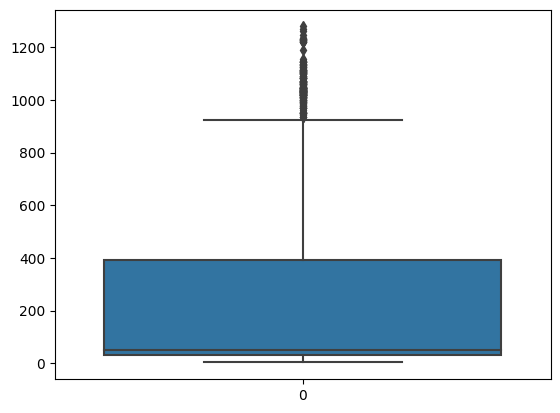

In [ ]:
sns.boxplot(data.Low)

<Axes: >

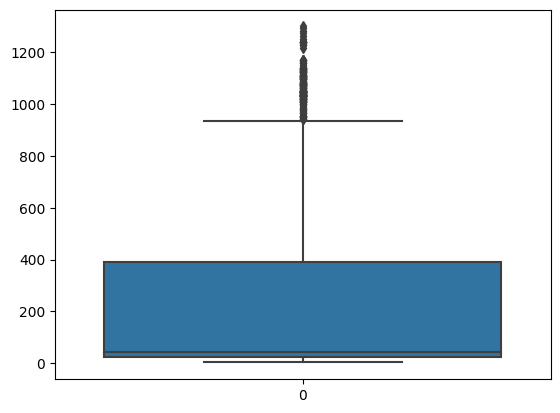

In [ ]:
sns.boxplot(data['Adj Close'])

<Axes: >

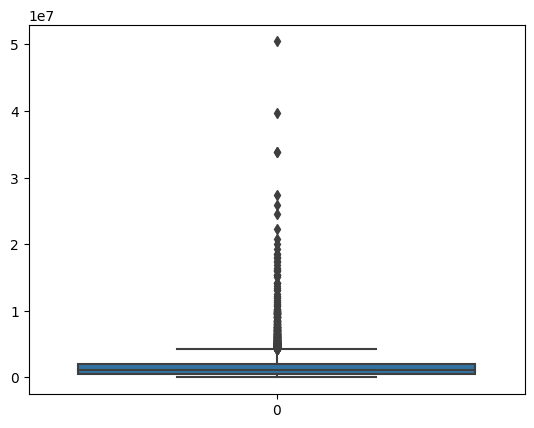

In [ ]:
sns.boxplot(data.Volume)

<Axes: >

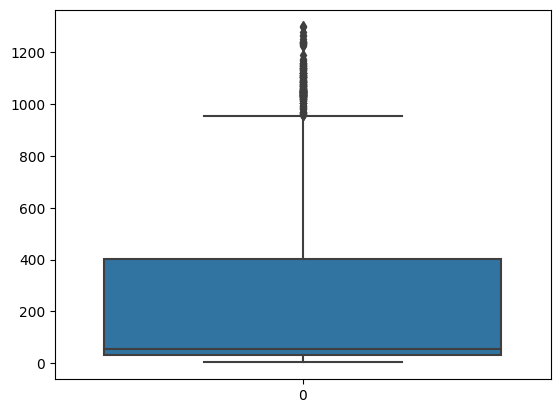

In [ ]:
sns.boxplot(data.NextOpen)

In [ ]:
# Removing the outliers using IQR
# z_scores = data.apply(lambda x: (x - x.mean()) / x.std())
# threshold = 3
# data = data[z_scores < threshold]
# data.isna().sum()

In [ ]:
# Filling the null values with the mean of that attribute
# data['Volume'].fillna(data['Volume'].mean(), inplace=True)
# data.isna().sum()

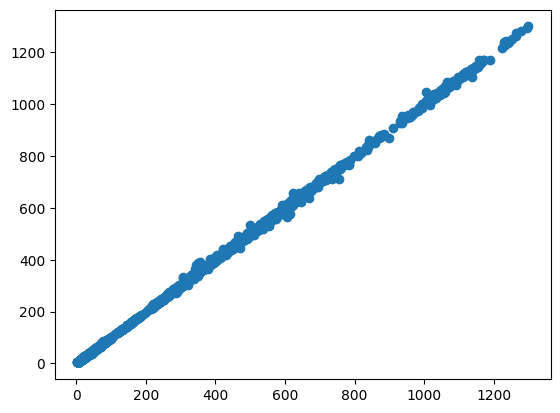

In [ ]:
# Pair plot of next open with all other attributes
plt.scatter(data.NextOpen, data.Close)

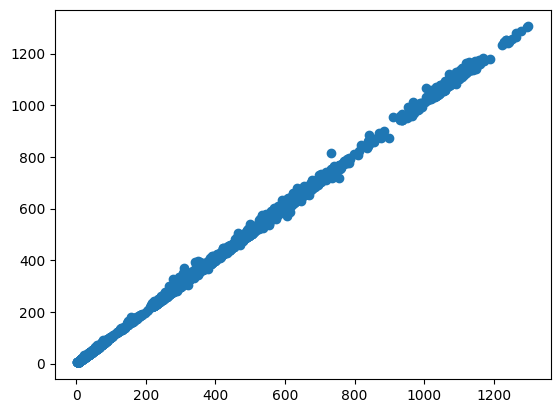

In [ ]:
plt.scatter(data.NextOpen, data.High)

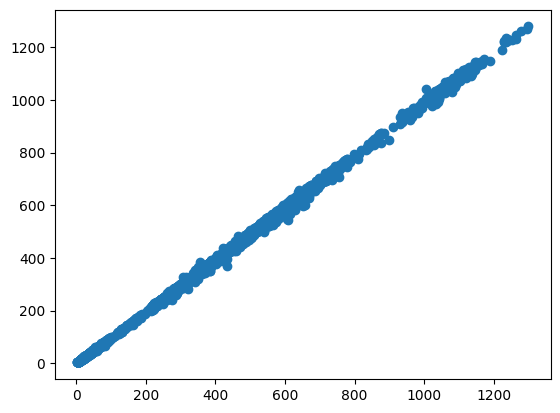

In [ ]:
plt.scatter(data.NextOpen, data.Low)

#### Creating the linear regression model

In [ ]:
# Splitting the data into training and testing data
# X_traiN= data.drop('NextOpen', axis=1)
# y_train = data['NextOpen']
# X_test = test

X= data.drop('NextOpen', axis=1)
y = data['NextOpen']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the regression model
from sklearn.ensemble import GradientBoostingRegressor

regression = LinearRegression()

# Fitting the training data into the model
regression.fit(X_train, y_train)

# Making the prediction
y_pred = regression.predict(X_test)

In [ ]:
# Coefficient and intercept value
# print(regression.intercept_)
# print(regression.coef_)

In [ ]:
# R Squared value
#print("R Square :", regression.score(X_test, y_test))

In [ ]:
df_preds = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_preds

,Actual,Predicted
1436,61.250000,60.916936
748,25.997499,25.816365
4119,356.649994,368.029596
1448,62.724998,62.255031
3898,282.000000,287.147521
...,...,...
2761,54.250000,53.951786
219,4.800000,4.654330
1831,36.375000,36.638958
1115,38.700001,38.764066


In [ ]:
#Accuracy (%)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

99.98277672611354

In [ ]:
data.head()

,High,Low,Close,Adj Close,Volume,NextOpen
0,12.4975,12.4975,12.4975,9.298194,100.0,11.85
1,12.0000,10.8000,11.5475,8.591388,33020.0,11.65
2,11.6500,10.9000,11.2000,8.332849,25500.0,11.05
3,11.0500,10.8000,10.8075,8.040827,13320.0,10.35
4,11.0000,10.3500,10.7425,7.992465,47520.0,10.95


#### Final Model with user input

In [ ]:
# Taking the user input
#user_open = float(input("Open: "))
user_high = float(input("High: "))
user_low = float(input("Low: "))
user_close = float(input("Close: "))
user_adjClose = float(input("Adjacent Close: "))
user_volume = float(input("Volume: "))

df = {
    #'Open': [user_open],
    'High': [user_high],
    'Low': [user_low],
    'Close': [user_close],
    'Adj Close': [user_adjClose],
    'Volume': [user_volume]
}

df_user = pd.DataFrame(df)
df_user.head()

High: 1339
Low: 1286
Close: 1332
Adjacent Close: 1332
Volume: 1703583


,High,Low,Close,Adj Close,Volume
0,1339.0,1286.0,1332.0,1332.0,1703583.0


In [ ]:
# Predicting the values 
y_pred_user = regression.predict(df_user)
y_pred_user.tolist()

[1332.6950859304031]